In [132]:
%matplotlib notebook
import pandas as pd
#import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_extraction.text import TfidfTransformer, TfidfVectorizer

In [2]:
df = pd.read_csv('../input/train.csv')

## Check train data

In [3]:
df[:3].T

,0,1,2
id,0,1,2
qid1,1,3,5
qid2,2,4,6
question1,What is the step by step guide to invest in sh...,What is the story of Kohinoor (Koh-i-Noor) Dia...,How can I increase the speed of my internet co...
question2,What is the step by step guide to invest in sh...,What would happen if the Indian government sto...,How can Internet speed be increased by hacking...
is_duplicate,0,0,0


In [4]:
df.loc[2,'question1'],df.loc[2,'question2'],

('How can I increase the speed of my internet connection while using a VPN?',
 'How can Internet speed be increased by hacking through DNS?')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404290 entries, 0 to 404289
Data columns (total 6 columns):
id              404290 non-null int64
qid1            404290 non-null int64
qid2            404290 non-null int64
question1       404290 non-null object
question2       404288 non-null object
is_duplicate    404290 non-null int64
dtypes: int64(4), object(2)
memory usage: 18.5+ MB


there are 2 null object in q2. fill that

In [6]:
df['question2'] = df['question2'].fillna('')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404290 entries, 0 to 404289
Data columns (total 6 columns):
id              404290 non-null int64
qid1            404290 non-null int64
qid2            404290 non-null int64
question1       404290 non-null object
question2       404290 non-null object
is_duplicate    404290 non-null int64
dtypes: int64(4), object(2)
memory usage: 18.5+ MB


## transform
use tfidf vectorizer (without using tf-idf)

In [157]:
vect = TfidfVectorizer(use_idf=False)

In [158]:
%time vect.fit(df.question1.append(df.question2))

CPU times: user 18.7 s, sys: 667 ms, total: 19.4 s
Wall time: 40.4 s


TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_idf=True,
        stop_words=None, strip_accents=None, sublinear_tf=False,
        token_pattern='(?u)\\b\\w\\w+\\b', tokenizer=None, use_idf=False,
        vocabulary=None)

In [159]:
%time df['q1_vect'] = list(vect.transform(df.question1))

CPU times: user 1min 16s, sys: 827 ms, total: 1min 17s
Wall time: 1min 23s


In [160]:
%time df['q2_vect'] = list(vect.transform(df['question2']))

CPU times: user 1min 18s, sys: 775 ms, total: 1min 19s
Wall time: 1min 29s


In [161]:
def question_cosine_distance(df):
    return cosine_distances(df.q1_vect, df.q2_vect)[0]

In [162]:
%time df['tf_nonstop_dist'] = df.apply(question_cosine_distance, axis=1)['id']

CPU times: user 12min 28s, sys: 0 ns, total: 12min 28s
Wall time: 12min 32s


In [163]:
from sklearn.metrics.pairwise import cosine_distances

<IPython.core.display.Javascript object>


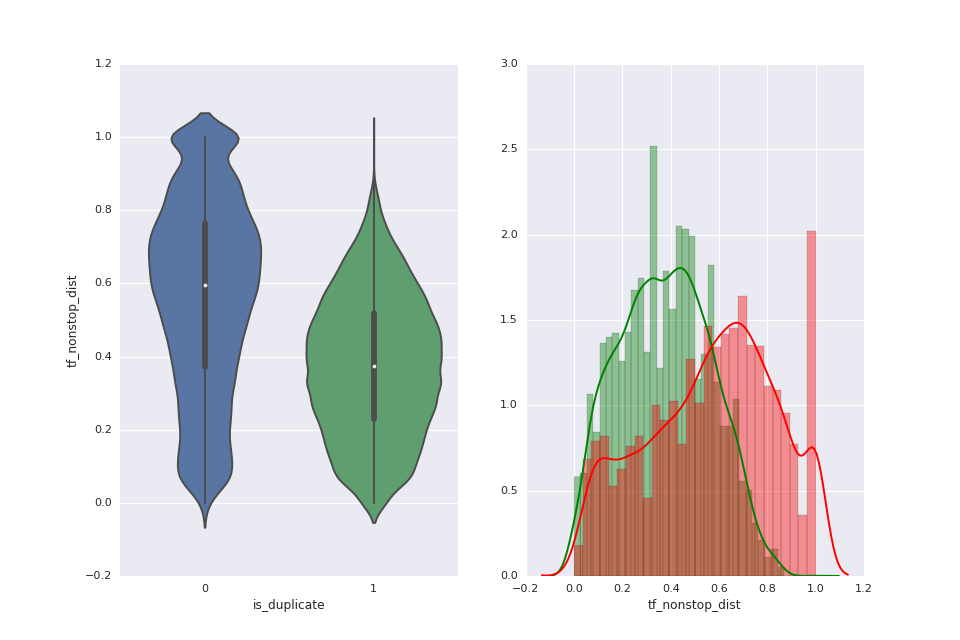

/root/anaconda3/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


In [225]:
plt.figure(figsize=(12, 8))
plt.subplot(1,2,1)
sns.violinplot(x = 'is_duplicate', y = 'tf_nonstop_dist', data = df[0:50000])
plt.subplot(1,2,2)
sns.distplot(df[df['is_duplicate'] == 1.0]['tf_nonstop_dist'][0:10000], color = 'green')
sns.distplot(df[df['is_duplicate'] == 0.0]['tf_nonstop_dist'][0:10000], color = 'red')

## transform (tf-idf, stopwords)

In [164]:
vect = TfidfVectorizer(use_idf=True)
%time vect.fit(df.question1.append(df.question2))

CPU times: user 22.4 s, sys: 133 ms, total: 22.6 s
Wall time: 24.3 s


TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_idf=True,
        stop_words=None, strip_accents=None, sublinear_tf=False,
        token_pattern='(?u)\\b\\w\\w+\\b', tokenizer=None, use_idf=True,
        vocabulary=None)

In [165]:
%time df['q1_vect'] = list(vect.transform(df.question1))
%time df['q2_vect'] = list(vect.transform(df['question2']))
%time df['tfidf_nonstop_dist'] = df.apply(question_cosine_distance, axis=1)['id']

CPU times: user 1min 17s, sys: 585 ms, total: 1min 18s
Wall time: 1min 21s
CPU times: user 1min 15s, sys: 661 ms, total: 1min 16s
Wall time: 1min 35s
CPU times: user 12min 13s, sys: 0 ns, total: 12min 13s
Wall time: 12min 32s


<IPython.core.display.Javascript object>


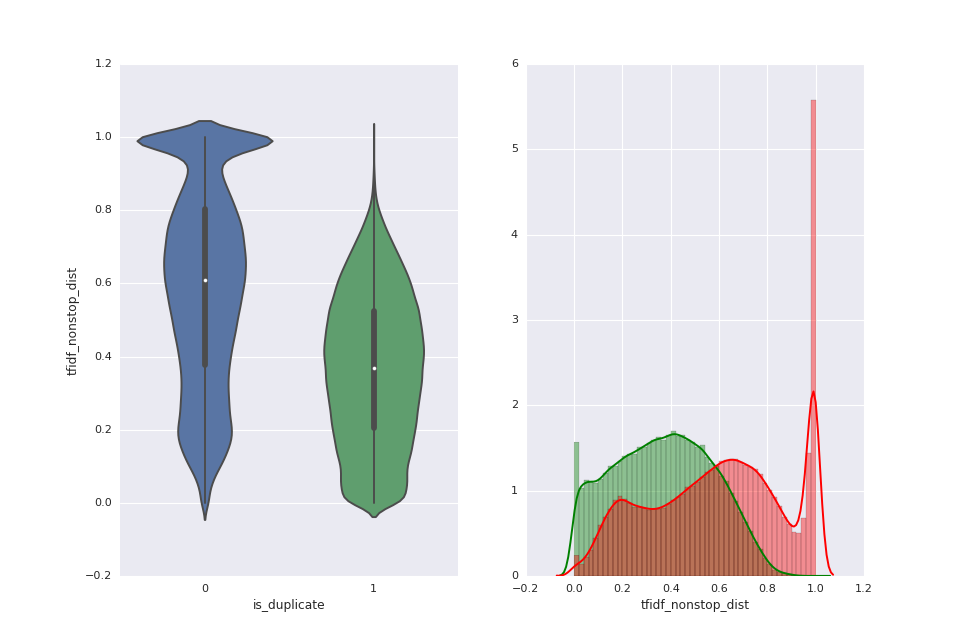

/root/anaconda3/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


In [226]:
plt.figure(figsize=(12, 8))
plt.subplot(1,2,1)
sns.violinplot(x = 'is_duplicate', y = 'tfidf_nonstop_dist', data = df)
plt.subplot(1,2,2)
sns.distplot(df[df['is_duplicate'] == 1.0]['tfidf_nonstop_dist'], color = 'green')
sns.distplot(df[df['is_duplicate'] == 0.0]['tfidf_nonstop_dist'], color = 'red')

In [ ]:
vect = TfidfVectorizer(use_idf=True, stop_words='english')
%time vect.fit(df.question1.append(df.question2))
%time df['q1_vect'] = list(vect.transform(df.question1))
%time df['q2_vect'] = list(vect.transform(df['question2']))
%time df['tfidf_stop_dist'] = df.apply(question_cosine_distance, axis=1)['id']

<IPython.core.display.Javascript object>


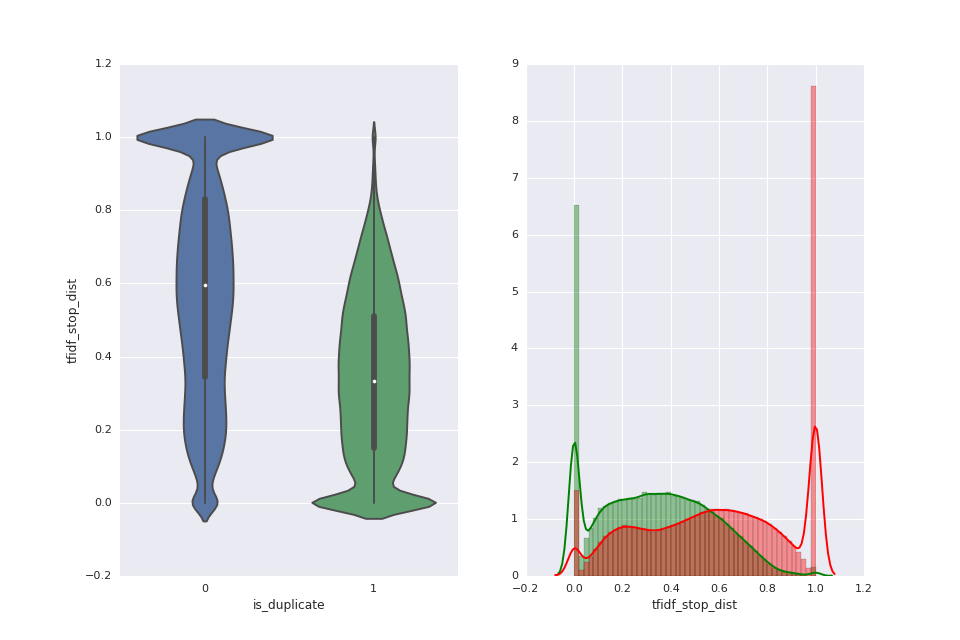

/root/anaconda3/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


In [227]:
#plot
plt.figure(figsize=(12, 8))
plt.subplot(1,2,1)
sns.violinplot(x = 'is_duplicate', y = 'tfidf_stop_dist', data = df)
plt.subplot(1,2,2)
sns.distplot(df[df['is_duplicate'] == 1.0]['tfidf_stop_dist'], color = 'green')
sns.distplot(df[df['is_duplicate'] == 0.0]['tfidf_stop_dist'], color = 'red')

In [ ]:
vect = TfidfVectorizer(use_idf=False, stop_words='english')
%time vect.fit(df.question1.append(df.question2))
%time df['q1_vect'] = list(vect.transform(df.question1))
%time df['q2_vect'] = list(vect.transform(df['question2']))
%time df['idf_stop_dist'] = df.apply(question_cosine_distance, axis=1)['id']

<IPython.core.display.Javascript object>


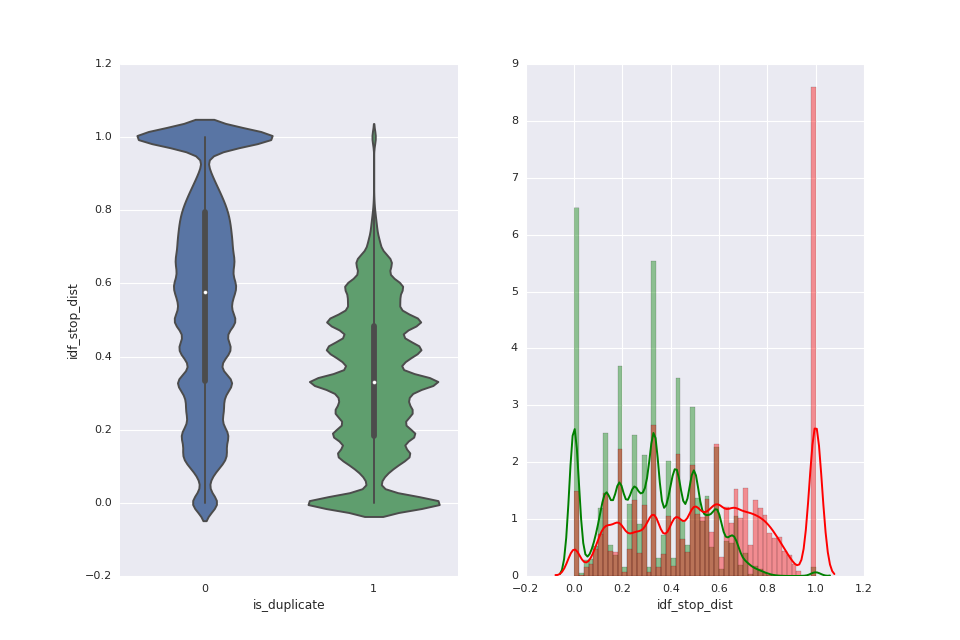

/root/anaconda3/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


In [228]:
#plot
plt.figure(figsize=(12, 8))
plt.subplot(1,2,1)
sns.violinplot(x = 'is_duplicate', y = 'idf_stop_dist', data = df)
plt.subplot(1,2,2)
sns.distplot(df[df['is_duplicate'] == 1.0]['idf_stop_dist'], color = 'green')
sns.distplot(df[df['is_duplicate'] == 0.0]['idf_stop_dist'], color = 'red')

In [152]:
from sklearn.metrics import log_loss

In [169]:
df_back = df.copy(deep=True)

In [172]:
#del(df['cos_dist'])
del(df['q1_vect'])
del(df['q2_vect'])

In [173]:
df[:3].T

,0,1,2
id,0,1,2
qid1,1,3,5
qid2,2,4,6
question1,What is the step by step guide to invest in sh...,What is the story of Kohinoor (Koh-i-Noor) Dia...,How can I increase the speed of my internet co...
question2,What is the step by step guide to invest in sh...,What would happen if the Indian government sto...,How can Internet speed be increased by hacking...
is_duplicate,0,0,0
tf_nonstop_dist,0.0550888,0.416667,0.634852
tfidf_nonstop_dist,0.0214848,0.250245,0.745323
tfidf_stop_dist,0.0182158,0.20806,0.723911
idf_stop_dist,0.057191,0.367544,0.634852


In [176]:
training_fields = ['tf_nonstop_dist','tfidf_nonstop_dist','tfidf_stop_dist','idf_stop_dist']

## learn 4 features

In [215]:
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import train_test_split
clf = SGDClassifier(loss='log')

In [213]:
X_train, X_test, y_train, y_test = train_test_split(
        df[training_fields], df['is_duplicate'], test_size=0.2, random_state=42)

In [218]:
clf.fit(X_train, y_train)

SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='log', n_iter=5, n_jobs=1,
       penalty='l2', power_t=0.5, random_state=None, shuffle=True,
       verbose=0, warm_start=False)

In [219]:
X_test['predict_proba'] = list(clf.predict_proba(X_test))

In [221]:
X_test['predict_proba'] = X_test['predict_proba'].apply(lambda x:x[1])

In [224]:
log_loss(y_test, X_test['predict_proba'])

0.56809686443975316